In [1]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 519.5MB 32kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59d2c000 @  0x7f6fd1b0c1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 20.1MB/s 
    100% |████████████████████████████████| 2.0MB 3.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import numpy as np
import time

In [0]:
# Building a Toy dataset

In [0]:
x_values = [i for i in range(11)]

In [0]:
x_train = np.array(x_values, dtype=np.float32).reshape(-1,1)

In [6]:
x_train.shape

(11, 1)

In [0]:
y_values = [2*i + 1 for i in x_values]

In [0]:
y_train = np.array(y_values, dtype=np.float32).reshape(-1,1)

In [9]:
y_train.shape

(11, 1)

In [10]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [0]:
# Building the model

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
class LRModel(nn.Module):
  def __init__(self, input_size, output_size):
#     LRModels inherits all the goodness from nn.Module
    super(LRModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
input_dim = 1
output_dim = 1
model = LRModel(input_dim, output_dim)

In [0]:
# loss class
criterion = nn.MSELoss()

In [0]:
# initiate optimizer class
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
epochs = 100000

In [0]:
tick = time.time()
for epoch in range(epochs):
  epoch += 1
  
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_train))
  
  #clear grads wrt params
  optimizer.zero_grad()
  
  #forward to get output
  outputs = model(inputs)
  
  #calculate loss
  loss = criterion(outputs, labels)
  
  #getting grads wrt to params
  loss.backward()
  
  #updating params
  optimizer.step()
  
#   print(f'epoch {epoch}, loss {loss.data[0]}')
tock = time.time()  

In [45]:
print('Time required was', tock-tick )

Time required was 29.576900959014893


In [20]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.9992277],
       [ 2.9993389],
       [ 4.9994497],
       [ 6.999561 ],
       [ 8.999672 ],
       [10.999783 ],
       [12.999894 ],
       [15.000006 ],
       [17.000116 ],
       [19.000227 ],
       [21.000338 ]], dtype=float32)

In [21]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

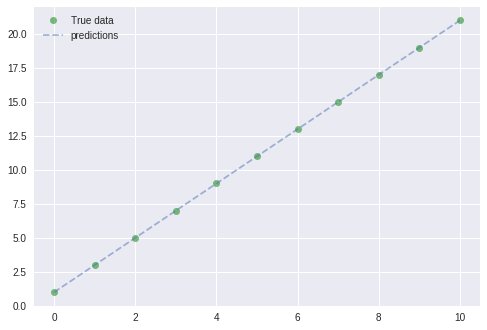

In [23]:
plt.figure()

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='predictions', alpha=0.5)
plt.legend()
plt.show

In [0]:
# saving the model

In [0]:
save_model = False
if save_model:
  #saves only parameters
  torch.save(model.state_dict(), 'lr.pkl')

In [26]:
!ls

sample_data


In [0]:
#loading the model
load_model = False
if load_model:
  model.load_state_dict(torch.load('lr.pkl'))

**GPU Implementation**

In [0]:
# Just move the model and variables on GPU

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
class LRModel(nn.Module):
  def __init__(self, input_size, output_size):
#     LRModels inherits all the goodness from nn.Module
    super(LRModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    out = self.linear(x)
    return out

In [48]:
input_dim = 1
output_dim = 1
model = LRModel(input_dim, output_dim)

# Using GPU
if torch.cuda.is_available():
  print('yes')
  model.cuda()

yes


In [0]:
# loss class
criterion = nn.MSELoss()

In [0]:
# initiate optimizer class
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
epochs = 100000

In [0]:
# Variables on GPU
if torch.cuda.is_available():
  inputs = Variable(torch.from_numpy(x_train).cuda())
  labels = Variable(torch.from_numpy(y_train).cuda())
else:
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_train))

tick1 = time.time()
for epoch in range(epochs):
  epoch += 1
  
  
  #clear grads wrt params
  optimizer.zero_grad()
  
  #forward to get output
  outputs = model(inputs)
  
  #calculate loss
  loss = criterion(outputs, labels)
  
  #getting grads wrt to params
  loss.backward()
  
  #updating params
  optimizer.step()
  
#   print(f'epoch {epoch}, loss {loss.data[0]}')
tock1 = time.time()  

In [58]:
print('Time required was', tock1-tick1 )

Time required was 114.95901465415955


In [0]:
# There is an overhead of extra seconds because you need to move the tensors from CPU to GPU RAM.